<b>Task content:</b>
Find a dataset suitable for multi-class classification. Prepare an analysis
data and a model using XGBoost, Logistic regression, and any of the models learned in the current
lesson (Decision Tree Algorithms). Compare the results obtained using any metric learned appropriate to evaluate the classification.

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [2]:
#the dataset
df = pd.read_csv('./bodyPerformance.csv')

The BodyPerfomance dataset downloaded from kaggle: https://www.kaggle.com/datasets/kukuroo3/body-performance-data contains variables (age, gender age and some exercise) that play important role in resulting better score in Body Performance.

In [3]:
#first look at the data
df.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


The dataset contains 12 columns. Each column has 13393 entries. There are no missing observations in the dataset. All columns except for "gender" and "class" contain float type of data. Columns "gender" and "class" data type is object.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0
broad jump_cm,13393.0,190.129627,39.868000,0.0,162.0,193.0,221.0,303.0


### Columns
1. Age - in years (21-64) - numerical data
1. Gender - Male(M)/Female(F) - categorical data
2. height_cm - height in cm (125-193,8) - numerical data
4. weight_kg - weight in kg (26,3 - 138,1) - numerical data
5. body fat_% - body fat in percentage (3 - 78,4) - numerical data
6. diastolic - blood pressure, the bottom number, measures the force your heart exerts on the walls of your arteries in between beats (0 -156.2) - numerical data
7. systolic: blood pressure, the top number, measures the force your heart exerts on the walls of your arteries each time it beats (0 - 201) - numerical data
8. gripForce: person grip strength in kilogram (0 - 70,5) - numerical data
9. sit and bend forward_cm: forward bend measured in centimeter (flexibility) (-25 -213) - numerical data
10. sit-ups counts: sit up in 1 repetition - (0 -80) - numerical data
11. broad jump_cm: high jump measured in centimeter (0 -303) - numerical data
12. class: performance score A,B,C,D ( A: best) / stratified (Target Variable) - categorical data

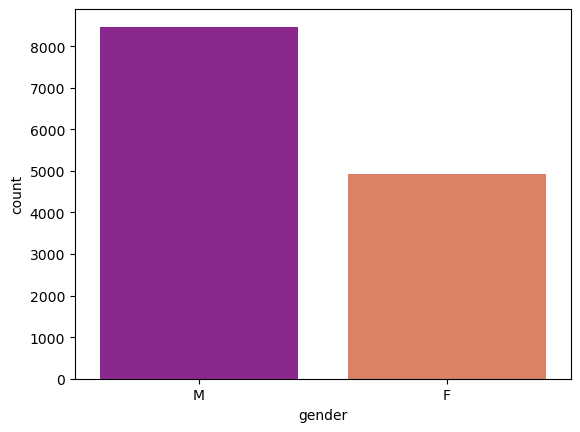

In [6]:
#plot gender column
ax = sns.countplot(x='gender', data=df, palette="plasma")
plt.show()

Most of the people in the dataset are men.

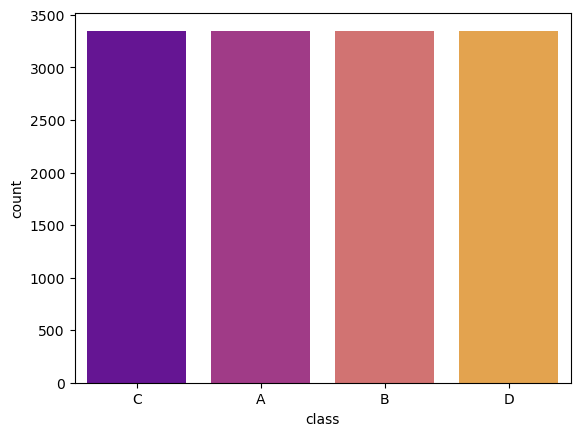

In [7]:
#plot class column to check class sizes
ax = sns.countplot(x='class', data=df, palette="plasma")
plt.show()

In [8]:
classes = df['class'].value_counts()
classes

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

Checking the size of the classes we know that the groups are almost equal. Groups C and D are 3349, A - 3348, and B is 3347. <br>
Because I will be using XGBoost model I need to do label encoding for categorical columns in the dataset. In most models from the sklearn library is not necessary because the models do it for us, but the XGBoost model comes from another library so I have to do it before I use the model.

In [9]:
# label encoding for categorical data
label_encoder = preprocessing.LabelEncoder()
  
# encode labels in column 'class'
df['class']= label_encoder.fit_transform(df['class'])

In [10]:
# encode labels in column 'gender'
df['gender']= label_encoder.fit_transform(df['gender'])

In [11]:
#create a new data frame with only numerical columns to check outliers
numerical_cols = df.drop(['gender', 'class'], axis=1)

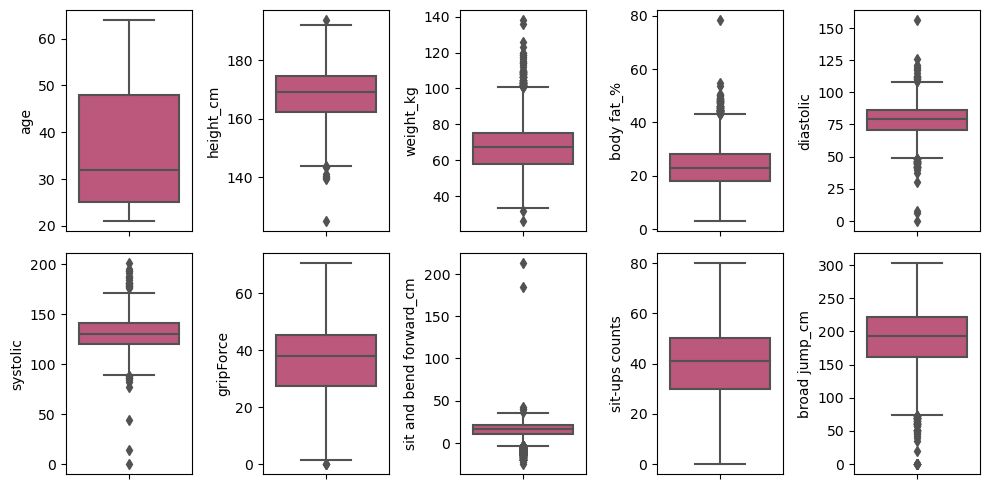

In [12]:
#plot boxplot for each column with numerical data
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in numerical_cols.items():
    sns.boxplot(y=k, data=df, ax=axs[index], palette="plasma")
    index = index + 1
plt.tight_layout()

Only column "age" and "sit-ups counts" don't have outliers. In most cpolumns we can observe many outliers, and I am going to replace them with the median value.

In [13]:
#create a function to detect and replace the outliers
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper,df.median(),np.where(df < lower,df.median(),df))
    return df

In [14]:
#replace outliers
df[['height_cm','weight_kg',
    'body fat_%','diastolic',
    'systolic','sit and bend forward_cm', 
    'broad jump_cm']] = impute_outliers_IQR(df[['height_cm','weight_kg','body fat_%',
                                                'diastolic','systolic',
                                                'sit and bend forward_cm', 'broad jump_cm']])

In [15]:
#create a new data frame with only numerical columns without outliers
numerical_cols_without_outliers = df.drop(['gender', 'class'], axis=1)

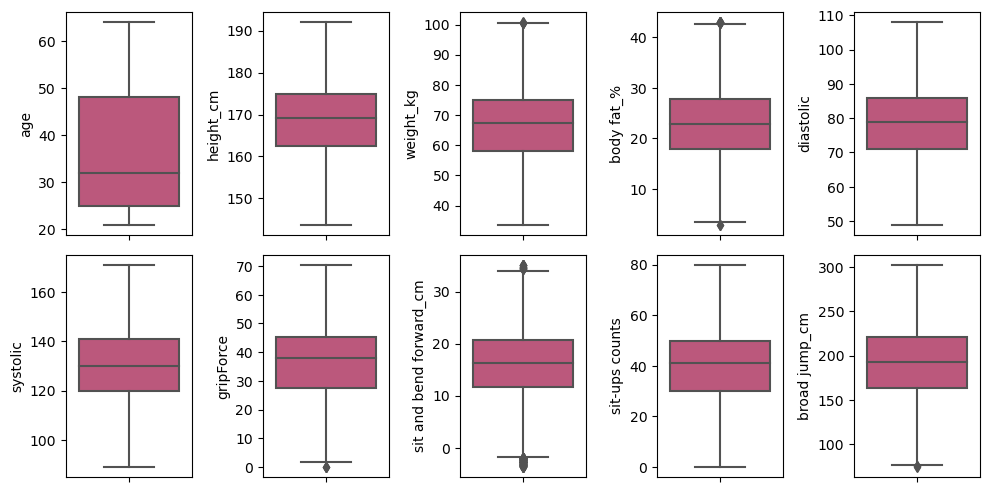

In [16]:
#plot boxplot for each column with numerical data without outliers
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in numerical_cols_without_outliers.items():
    sns.boxplot(y=k, data=df, ax=axs[index], palette="plasma")
    index = index + 1
plt.tight_layout()

### XGBoost model
Now I am going to create a XGboost Classifier model for the classification. I am going to predict the data in the "class" column.

In [17]:
target = 'class'
X = df.drop(target,axis=1)#features
y = df[target] #target

In [18]:
#feature selection using Sequential Feature Selector "forward"
model = XGBClassifier(random_state=0)
sfs_forward = SequentialFeatureSelector(
    model, n_features_to_select=8, direction="forward").fit(X, y)

In [19]:
#check the selected features names
X.columns[sfs_forward.get_support()]

Index(['age', 'gender', 'weight_kg', 'body fat_%', 'gripForce',
       'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'],
      dtype='object')

In [20]:
selected_columns = X.columns[sfs_forward.get_support()]

In [21]:
#split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, test_size=0.33, random_state=42)

In [23]:
model.fit(X_train, y_train)#train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

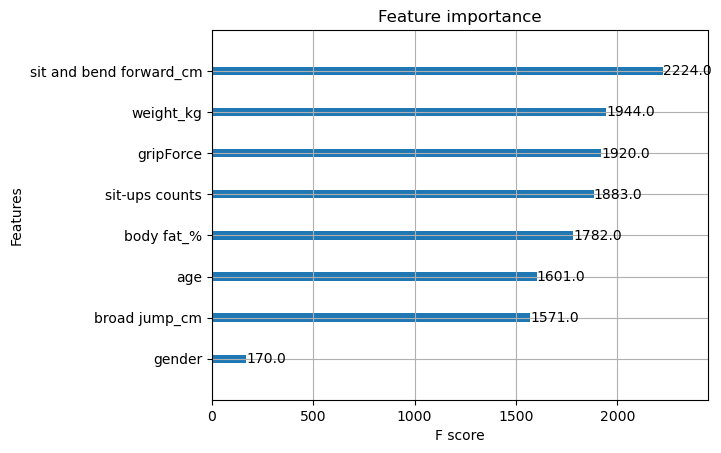

In [24]:
# checking the features importance
xgboost.plot_importance(model)
plt.show()

In [25]:
y_pred = model.predict(X_test)#predict

In [26]:
#get the classification report for the XGBoost model
print(classification_report(y_test, y_pred,target_names=['A', 'B', 'C', 'D']))

              precision    recall  f1-score   support

           A       0.77      0.85      0.81      1134
           B       0.63      0.64      0.63      1060
           C       0.73      0.69      0.71      1074
           D       0.89      0.84      0.86      1152

    accuracy                           0.76      4420
   macro avg       0.75      0.75      0.75      4420
weighted avg       0.76      0.76      0.76      4420



The accuracy of the XGboost Classifier model is 0.76 which means that the model correctly classified 76% of the samples in the dataset.The highest precission was in class "D". The highest recall is in class "A" which means that out of all the actual instances of class "D" in the dataset, 75% of them were correctly identified by the XGboost model. The highest F1 score(0.86) is in class "D".

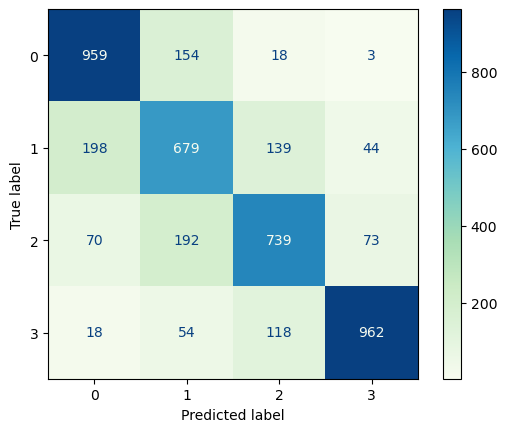

In [27]:
#plot a confusion matrix for the XGBoost model
cm_xgb = confusion_matrix(y_test, y_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap='GnBu') 
plt.show()

### Logistic regression model
Now I am going to use the same data in a logistic regression model.

In [28]:
#create a Logistic Regression model
logistic = LogisticRegression(random_state=0)

In [29]:
#for Logistic Regression I am going to scale the data using the Standard Scaler
scaler = StandardScaler()

In [30]:
#make a pipeline
pipe = Pipeline([("scaler", scaler), ("logistic", logistic)])

In [31]:
#feature selection using the forward selection
sfs_log = SequentialFeatureSelector(pipe, n_features_to_select=8, direction="forward", )
selected_features_log = sfs_log.fit(X, y)

In [32]:
#check the selected features names
X.columns[sfs_log.get_support()]

Index(['age', 'gender', 'weight_kg', 'body fat_%', 'gripForce',
       'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'],
      dtype='object')

In [33]:
selected_columns_log = X.columns[sfs_forward.get_support()]

In [34]:
#split the data into train and test data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X[selected_columns_log], y, test_size=0.33, random_state=42)

In [35]:
pipe.fit(X_train_log, y_train_log)#train the model

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=0))])

In [36]:
y_pred_log = pipe.predict(X_test_log)#predict

In [37]:
#chek the features importance
importance = np.abs(logistic.coef_[0])
feature_names = list(X_train.columns)

#sort features by importance
feature_importance = list(zip(feature_names, importance))
feature_importance.sort(key=lambda x: x[1], reverse=True)

for feature in feature_importance:
    print(feature)

('sit-ups counts', 1.9911747365228079)
('gender', 1.4529754087935012)
('sit and bend forward_cm', 1.4528827697371864)
('age', 1.3921560290331814)
('gripForce', 1.0642066539423118)
('weight_kg', 1.011983765176796)
('broad jump_cm', 0.7447315478245184)
('body fat_%', 0.17303136990092502)


In [38]:
# get the classification report for the Logistic regression model
print(classification_report(y_test_log, y_pred_log, target_names=['A', 'B', 'C', 'D']))

              precision    recall  f1-score   support

           A       0.72      0.71      0.72      1134
           B       0.44      0.45      0.44      1060
           C       0.51      0.50      0.50      1074
           D       0.74      0.75      0.75      1152

    accuracy                           0.61      4420
   macro avg       0.60      0.60      0.60      4420
weighted avg       0.61      0.61      0.61      4420



The accuracy of the Logistic Regression model is 0.61 which means that the model correctly classified 61% of the samples in the dataset.The highest precission was in the class "D". The highest recall is also in class "D" which means that out of all the actual instances of class "D" in the dataset, 75% of them were correctly identified by the Logist Regression model. The highest F1 score(0.75) is also in class "D".

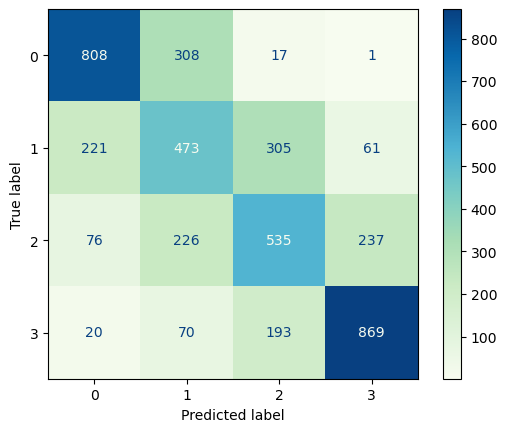

In [39]:
#plot a confusion matrix for the Logistic regression model
cm_log = confusion_matrix(y_test_log, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(cmap='GnBu') 
plt.show()

### Random Forest Classifier
The third model I am going to use is Random Forest Classifier. Late I am going to compare the results of all three models.

In [40]:
#create a Random Forest Classifier model
rfc = RandomForestClassifier(random_state=0)

In [41]:
#feature selection using the forward selection
sfs_forward_rfc = SequentialFeatureSelector(
    rfc, n_features_to_select=8, direction="forward").fit(X, y)

In [42]:
#check the selcted features names 
X.columns[sfs_forward_rfc.get_support()]

Index(['age', 'gender', 'weight_kg', 'body fat_%', 'diastolic',
       'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'],
      dtype='object')

In [43]:
selected_columns_rfc = X.columns[sfs_forward_rfc.get_support()]

In [44]:
#split data into train and test data
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X[selected_columns_rfc], y, test_size=0.33, random_state=42)

In [45]:
rfc.fit(X_train_rfc, y_train_rfc)

RandomForestClassifier(random_state=0)

In [46]:
y_pred_rfc = rfc.predict(X_test_rfc)#predict

In [47]:
#check the features importance
importance_rfc = rfc.feature_importances_
feature_names_rfc = list(X_train_rfc.columns)

#sort features by importance
feature_importance_rfc = list(zip(feature_names_rfc, importance_rfc))
feature_importance_rfc.sort(key=lambda x: x[1], reverse=True)


for feature in feature_importance_rfc:
    print(feature)

('sit and bend forward_cm', 0.2647362256522909)
('sit-ups counts', 0.1628238377038148)
('body fat_%', 0.1269483983170846)
('weight_kg', 0.12590197950435023)
('age', 0.11284983557897696)
('broad jump_cm', 0.11032735123721552)
('diastolic', 0.08058712839277515)
('gender', 0.015825243613491875)


In [48]:
# get the classification report for the Random Forest Classifier
print(classification_report(y_test_rfc, y_pred_rfc, target_names=['A', 'B', 'C', 'D']))

              precision    recall  f1-score   support

           A       0.74      0.83      0.78      1134
           B       0.58      0.59      0.59      1060
           C       0.69      0.64      0.66      1074
           D       0.86      0.81      0.83      1152

    accuracy                           0.72      4420
   macro avg       0.72      0.72      0.72      4420
weighted avg       0.72      0.72      0.72      4420



The accuracy of the Random Forest Classifier model is 0.72 which means that the model correctly classified 72% of the samples in the dataset.The highest precission was in the class "D". The highest recall is in class "A" which means that out of all the actual instances of class "A" in the dataset, 83% of them were correctly identified by the Random Forest Classifier model. The highest F1 score is in class "D".

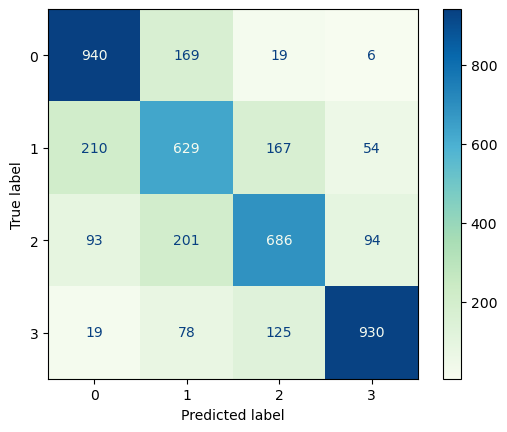

In [49]:
#plot a confusion matrix for the Random Forest Classifier
cm_rfc = confusion_matrix(y_test_rfc, y_pred_rfc)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc)
disp_rfc.plot(cmap='GnBu') 
plt.show()

### Conclusion
The XGBoost and Random Forest models achieved higher accuracy rates of 76% and 73%, respectively, while the Logistic Regression model only achieved 61% accuracy.Based on these results, it appears that the tree-based models  were better suited to this dataset than the Logistic Regression model.